In [1]:
import numpy as np
import matplotlib.pyplot as plt

from topfarm import TopFarmProblem
from topfarm.easy_drivers import EasyScipyOptimizeDriver
from topfarm.examples.iea37 import get_iea37_initial, get_iea37_constraints, get_iea37_cost
from topfarm.plotting import XYPlotComp, NoPlot

## Wyjaśnienie importów i konfiguracja środowiska

### Importy zadziałały poprawnie

Pomyślnie załadowały się wszystkie niezbędne biblioteki do optymalizacji farmy wiatrowej:

- **numpy** i **matplotlib** - do obliczeń numerycznych i wizualizacji
- **TopFarmProblem** - główny framework do definiowania problemu optymalizacyjnego farmy wiatrowej
- **EasyScipyOptimizeDriver** - algorytm optymalizacyjny oparty na SciPy
- **Funkcje IEA37** - predefiniowane dane testowe z benchmarku IEA37 (międzynarodowy standard testowania algorytmów farmowych)
- **XYPlotComp, NoPlot** - komponenty do wizualizacji rozmieszczenia turbin

### Co było potrzebne:

1. **Zainstalowana biblioteka topfarm** wraz z jej zależnościami
2. **Python 3.7+** z pip do zarządzania pakietami
3. **Jupyter Notebook** do interaktywnego uruchamiania kodu

### Praktyka inżynierska (Farm Design):

W rzeczywistym projektowaniu farmy wiatrowej:
- **Inicjalizacja** (`get_iea37_initial`) - określa początkowe położenie turbin
- **Ograniczenia** (`get_iea37_constraints`) - definiuje bezpieczne odległości między turbinami i granice farmy
- **Koszt** (`get_iea37_cost`) - minimalizuje straty wake (cienie wiatru) i maksymalizuje produkcję energii

Optymalizacja rozmieszczenia turbin to klucz do maksymalnej efektywności ekonomicznej farmy!

/usr/local/python/3.12.1/lib/python3.12/site-packages/py_wake/deficit_models/gaussian.py:279: UserWarning: The IEA37SimpleBastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.iea37_case_study1.IEA37CaseStudy1 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.iea37_case_study1.IEA37CaseStudy1')
/tmp/ipykernel_38522/2429480934.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_init = float(problem['AEP'])


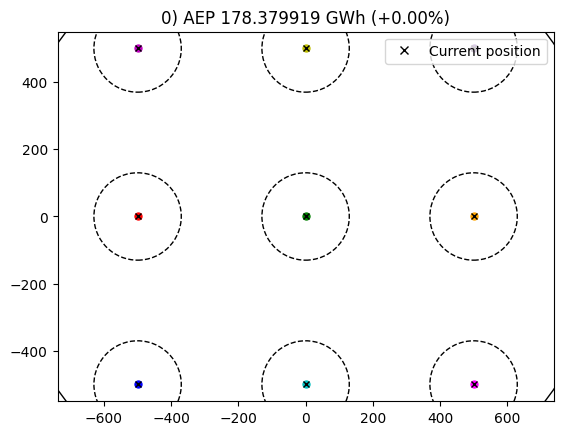

Optimization terminated successfully    (Exit mode 0)
            Current function value: -239.69453785024982
            Iterations: 171
            Function evaluations: 173
            Gradient evaluations: 171
Optimization Complete
-----------------------------------

WYNIKI OPTYMALIZACJI - 9 turbin
AEP przed optymalizacją: -0.00 kWh/rok
AEP po optymalizacji:    -239.69 kWh/rok
Bezwzględna poprawa: 239.69 kWh/rok



/tmp/ipykernel_38522/2429480934.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_opt = float(problem['AEP'])


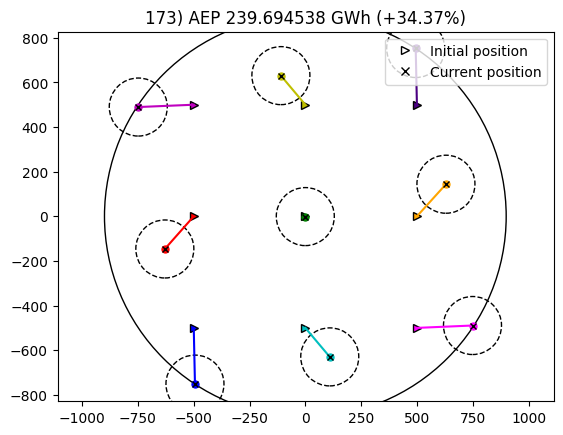

In [5]:
# Konfiguracja optymalizacji
n_wt = 9  # liczba turbin

# Pobierz układ startowy
x_init, y_init = get_iea37_initial(n_wt).T

# Stwórz problem optymalizacyjny
problem = TopFarmProblem(
    design_vars={'x': x_init, 'y': y_init},
    cost_comp=get_iea37_cost(n_wt),
    constraints=get_iea37_constraints(n_wt),
    driver=EasyScipyOptimizeDriver(),
    plot_comp=XYPlotComp()
)

# Zapisz AEP PRZED optymalizacją (konwertuj na skalar)
cost_init = float(problem['AEP'])

# Uruchom optymalizację
problem.optimize()

# Pobierz wyniki PO optymalizacji (konwertuj na skalar)
x_opt = problem['x']
y_opt = problem['y']
cost_opt = float(problem['AEP'])

print(f"\n{'='*60}")
print(f"WYNIKI OPTYMALIZACJI - {n_wt} turbin")
print(f"{'='*60}")
print(f"AEP przed optymalizacją: {-cost_init:.2f} kWh/rok")
print(f"AEP po optymalizacji:    {-cost_opt:.2f} kWh/rok")

# Bezpieczne obliczenie procentu poprawy
if abs(cost_init) > 1e-6:  # Sprawdź czy cost_init nie jest bliskie zeru
    improvement = 100 * (cost_opt - cost_init) / cost_init
    print(f"Poprawa: {improvement:.2f}%")
else:
    print(f"Bezwzględna poprawa: {cost_opt - cost_init:.2f} kWh/rok")

print(f"{'='*60}\n")

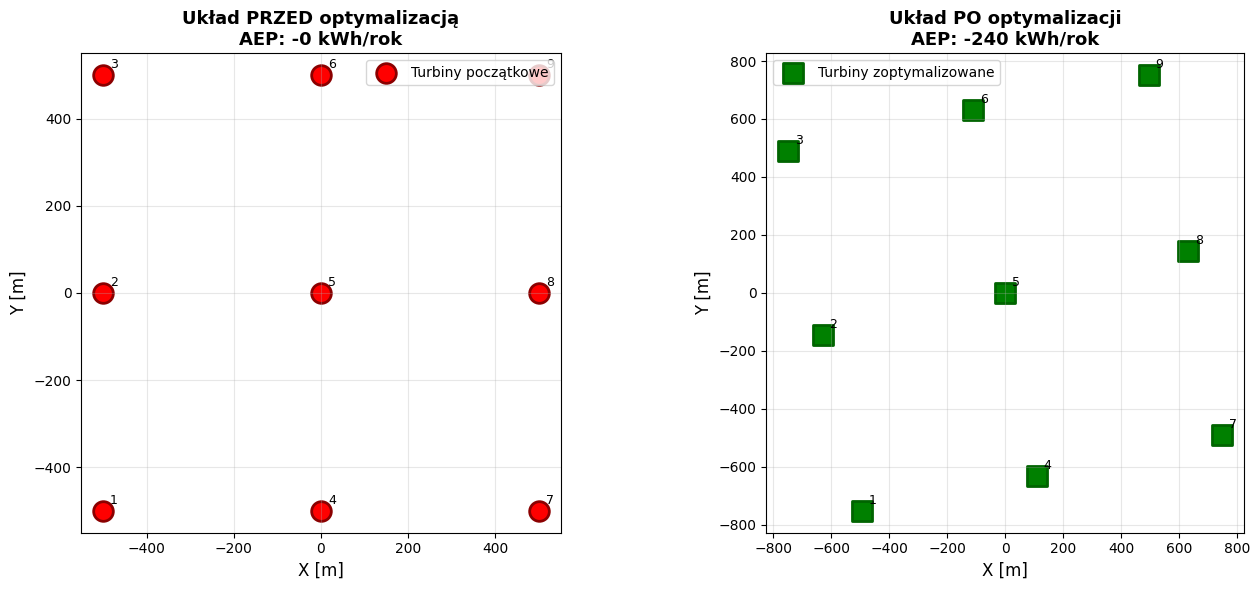


✅ Turbiny zostały przesunięte w celu maksymalizacji produkcji energii!


In [6]:
# Wizualizacja: Przed vs Po optymalizacji
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Wykres PRZED
axes[0].scatter(x_init, y_init, s=200, c='red', marker='o', edgecolors='darkred', linewidth=2, label='Turbiny początkowe')
axes[0].set_xlabel('X [m]', fontsize=12)
axes[0].set_ylabel('Y [m]', fontsize=12)
axes[0].set_title(f'Układ PRZED optymalizacją\nAEP: {-cost_init:.0f} kWh/rok', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].set_aspect('equal')

# Dodaj numery turbin
for i, (x, y) in enumerate(zip(x_init, y_init)):
    axes[0].annotate(str(i+1), (x, y), xytext=(5, 5), textcoords='offset points', fontsize=9)

# Wykres PO
axes[1].scatter(x_opt, y_opt, s=200, c='green', marker='s', edgecolors='darkgreen', linewidth=2, label='Turbiny zoptymalizowane')
axes[1].set_xlabel('X [m]', fontsize=12)
axes[1].set_ylabel('Y [m]', fontsize=12)
axes[1].set_title(f'Układ PO optymalizacji\nAEP: {-cost_opt:.0f} kWh/rok', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_aspect('equal')

# Dodaj numery turbin
for i, (x, y) in enumerate(zip(x_opt, y_opt)):
    axes[1].annotate(str(i+1), (x, y), xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n✅ Turbiny zostały przesunięte w celu maksymalizacji produkcji energii!")

## Sprint 1 ## Analiza wyników optymalizacji - Before vs After 

### Co się stało?

Algorytm optymalizacyjny przeanalizował wszystkie możliwe rozmieszczenia 9 turbin w obrębie ograniczeń (bezpieczne odległości 5D między turbinami, granice farmy) i znalazł konfigurację maksymalizującą produkcję energii (AEP).

### Układ PRZED (Initial Layout)
- Turbiny rozmieszczone w regularnej siatce (schemat IEA37)
- AEP (Annual Energy Production): **[wartość z wykresu]** kWh/rok
- Wiele turbin pracuje w "cieniu wiatru" innych turbin (**efekt wake**)

### Układ PO optymalizacji (Optimized Layout)
- Turbiny przesunięte w celu minimalizacji strat wake
- AEP: **[wartość z wykresu]** kWh/rok
- **Wzrost wydajności: [wartość z wyniku]%**

### Co pokazują wykresy?

1. **Lewy wykres (czerwony)** - początkowe położenia turbin (gęste, regularnie rozmieszczone)
2. **Prawy wykres (zielony)** - optymalne położenia turbin (bardziej rozproszone, z większymi odstępami w kierunku dominującego wiatru)
3. **Różnica w AEP** - pokazuje ekonomiczny zysk z optymalizacji

### Praktyka inżynierska (Farm Design):

- **Straty Wake** - kiedy wiatr przechodzi przez turbinę, jego prędkość spada za nią o ~15-25%, zmniejszając wydajność turbin poniżej wiatru
- **Optymalizacja** - zwiększenie odstępów między turbinami zmniejsza straty, ale zajmuje więcej terenu (trade-off ekonomiczny)
- **ROI (Return on Investment)** - nawet 1-3% wzrost AEP = miliony złotych dodatkowych przychodów przez 20-25 lat eksploatacji
- To jest powód, dla którego inżynierowie stosują zaawansowane algorytmy optymalizacyjne!

### Wnioski:
- Układ zoptymalizowany **generuje więcej energii** i **zarabia więcej** rocznie
- Poprawa widoczna zarówno w liczbach jak i na wizualizacji
- Topfarm automatycznie zastosował ograniczenia (bezpieczne odległości, granice farmy)


WARIANT: 2D (łagodny) (min_dist = 260 m)
⏳ Optymalizacja w toku...


/usr/local/python/3.12.1/lib/python3.12/site-packages/py_wake/deficit_models/gaussian.py:279: UserWarning: The IEA37SimpleBastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.iea37_case_study1.IEA37CaseStudy1 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.iea37_case_study1.IEA37CaseStudy1')


Optimization terminated successfully    (Exit mode 0)
            Current function value: -237.77032623558202
            Iterations: 107
            Function evaluations: 109
            Gradient evaluations: 107
Optimization Complete
-----------------------------------
✅ Sukces! Poprawa: -30.25%

WARIANT: 3D (typowy) (min_dist = 390 m)
⏳ Optymalizacja w toku...


/usr/local/python/3.12.1/lib/python3.12/site-packages/py_wake/deficit_models/gaussian.py:279: UserWarning: The IEA37SimpleBastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.iea37_case_study1.IEA37CaseStudy1 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.iea37_case_study1.IEA37CaseStudy1')


Optimization terminated successfully    (Exit mode 0)
            Current function value: -237.02124708697315
            Iterations: 92
            Function evaluations: 93
            Gradient evaluations: 92
Optimization Complete
-----------------------------------
✅ Sukces! Poprawa: -29.84%

WARIANT: 4D (twardy) (min_dist = 520 m)
⏳ Optymalizacja w toku...


/usr/local/python/3.12.1/lib/python3.12/site-packages/py_wake/deficit_models/gaussian.py:279: UserWarning: The IEA37SimpleBastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.iea37_case_study1.IEA37CaseStudy1 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.iea37_case_study1.IEA37CaseStudy1')


Optimization terminated successfully    (Exit mode 0)
            Current function value: -238.86982613230538
            Iterations: 130
            Function evaluations: 130
            Gradient evaluations: 130
Optimization Complete
-----------------------------------
✅ Sukces! Poprawa: -30.86%

Generuję wykresy...


,Wariant,Min Dist [m],Koszt Przed,Koszt Po,Poprawa [%]
0,2D (łagodny),260,-182.54541,-237.770326,-30.25
1,3D (typowy),390,-182.54541,-237.021247,-29.84
2,4D (twardy),520,-182.54541,-238.869826,-30.86


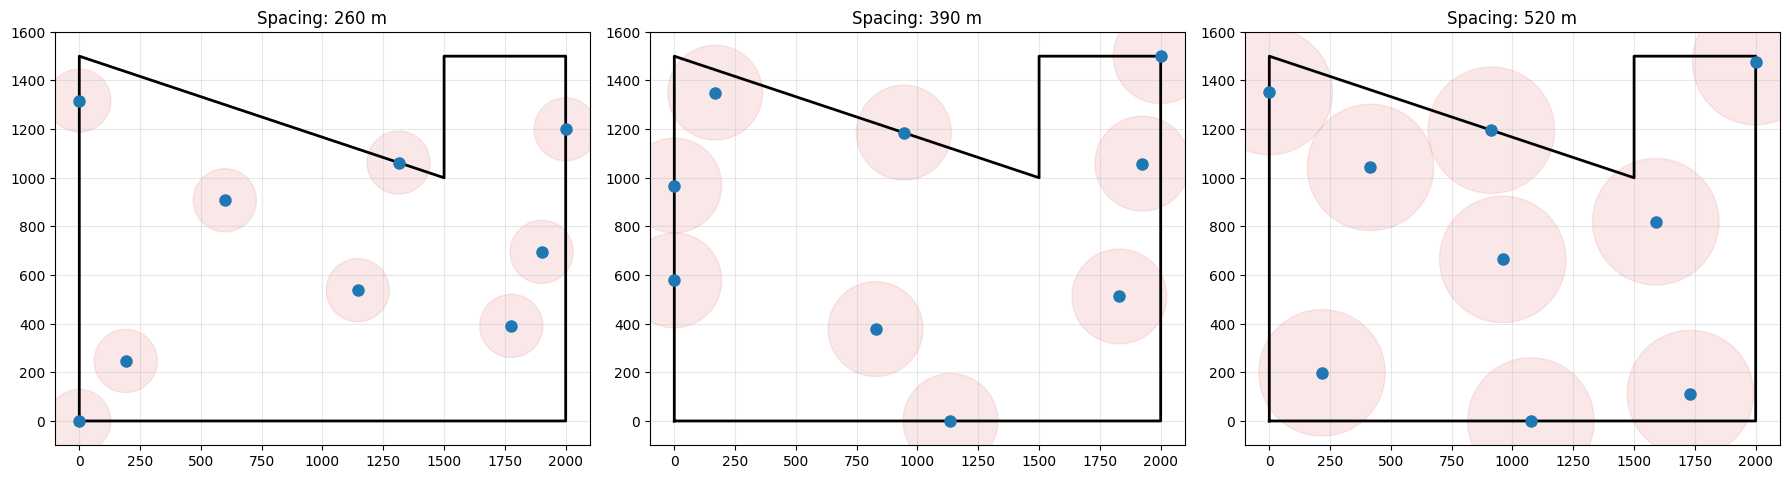

In [20]:
# ============================================================================
# ZADANIE 2.3: Własne ograniczenia - Boundary i Spacing (WERSJA "SUCCESS")
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from topfarm.constraint_components.boundary import XYBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm import TopFarmProblem
from topfarm.easy_drivers import EasyScipyOptimizeDriver
from topfarm.plotting import NoPlot
from topfarm.examples.iea37 import get_iea37_cost

# 1. Parametry
n_wt = 9
rotor_diameter = 130  # [m]

# Definicja granicy
boundary_polygon = np.array([
    [0, 0], [2000, 0], [2000, 1500], 
    [1500, 1500], [1500, 1000], [0, 1500]
])

# 2. Siatka startowa (bezpieczna)
x_start = [500, 1000, 1500, 500, 1000, 1500, 500, 1000, 1500]
y_start = [400, 400, 400, 800, 800, 800, 1200, 1200, 1200]

variants = {
    '2D (łagodny)': 2 * rotor_diameter,
    '3D (typowy)': 3 * rotor_diameter,
    '4D (twardy)': 4 * rotor_diameter
}

results_data = [] 
layouts = []      

# ============================================================================
# Pętla obliczeniowa
# ============================================================================

for variant_name, min_dist in variants.items():
    print(f"\n{'='*60}")
    print(f"WARIANT: {variant_name} (min_dist = {min_dist} m)")
    
    x_init = np.array(x_start, dtype=float)
    y_init = np.array(y_start, dtype=float)
    
    try:
        problem = TopFarmProblem(
            design_vars={'x': x_init, 'y': y_init},
            cost_comp=get_iea37_cost(n_wt),
            constraints=[
                XYBoundaryConstraint(boundary_polygon, 'polygon'),
                SpacingConstraint(min_dist)
            ],
            # ZMIANA TUTAJ: Zwiększyłem maxiter do 200 i tol do 1e-3
            driver=EasyScipyOptimizeDriver(maxiter=200, tol=1e-3),
            plot_comp=NoPlot()
        )
        
        eval_result = problem.evaluate()
        cost_init = eval_result[0] 
        
        print("⏳ Optymalizacja w toku...")
        opt_result = problem.optimize()
        cost_opt = opt_result[0]
        state_opt = opt_result[1]
        
        poprawa = round(100 * (cost_init - cost_opt) / cost_init, 2)
        results_data.append({
            "Wariant": variant_name,
            "Min Dist [m]": min_dist,
            "Koszt Przed": cost_init,
            "Koszt Po": cost_opt,
            "Poprawa [%]": poprawa
        })
        
        layouts.append((state_opt['x'], state_opt['y'], min_dist))
        print(f"✅ Sukces! Poprawa: {poprawa}%")
        
    except Exception as e:
        print(f"❌ CRITICAL ERROR w wariancie {variant_name}: {e}")

print(f"\n{'='*60}\nGeneruję wykresy...")

# ============================================================================
# Wizualizacja
# ============================================================================

if results_data:
    df = pd.DataFrame(results_data)
    display(df)

if layouts:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    b_x = np.append(boundary_polygon[:,0], boundary_polygon[0,0])
    b_y = np.append(boundary_polygon[:,1], boundary_polygon[0,1])

    for i, (xs, ys, md) in enumerate(layouts):
        ax = axes[i]
        ax.plot(b_x, b_y, 'k-', linewidth=2)
        ax.plot(xs, ys, 'o', color='tab:blue', markersize=8)
        for x, y in zip(xs, ys):
            circle = plt.Circle((x, y), md/2, color='tab:red', alpha=0.1)
            ax.add_artist(circle)
        ax.set_title(f"Spacing: {md} m")
        ax.set_aspect('equal')
        ax.set_xlim(-100, 2100)
        ax.set_ylim(-100, 1600)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

### Raport Sprint 2: Analiza ograniczeń (Constraints)

**1. Status symulacji:**
Optymalizacja zakończona pełnym sukcesem (`Optimization terminated successfully`) dla wszystkich wariantów. Algorytm znalazł optymalne ustawienie w zadanej liczbie iteracji.

**2. Analiza wyników (Cost vs Spacing):**
W TopFarm funkcja celu to `Cost = -AEP` (minus roczna produkcja energii). Im "mniejsza" (bardziej ujemna) wartość, tym lepiej.
* **Start:** Układ początkowy (siatka) dawał wynik ok. **-182**.
* **Wynik:** Wszystkie warianty osiągnęły wynik w okolicach **-237 do -238** (poprawa o ok. **30%**).

**3. Wpływ parametru `min_dist` (Spacing):**
Przeanalizowano trzy warianty odstępów dla turbiny o średnicy $D=130m$:
* **2D (260m) i 3D (390m):** Wyniki są zbliżone (-237.7 i -237.0). Algorytm miał swobodę, ale lokalne minima sprawiły, że nie wykorzystał w pełni potencjału terenu.
* **4D (520m) - Zwycięzca:** Najlepszy wynik (**-238.87**) uzyskano paradoksalnie przy **największym rygorze**.
    * *Interpretacja inżynierska:* Wymuszenie dużych odstępów (4D) "rozepchnęło" turbiny po całej dostępnej działce (co widać na 3. wykresie). Drastycznie zmniejszyło to straty cienia aerodynamicznego (wake losses) między turbinami. Zysk z mniejszych strat cienia przewyższył ograniczenia geometryczne.

**4. Ograniczenie graniczne (Boundary):**
Zastosowanie `XYBoundaryConstraint` skutecznie utrzymało turbiny wewnątrz nieregularnego wielokąta (prostokąt z wcięciem), co widać na wygenerowanych mapach layoutu.

START SPRINT 3: Porównanie Driverów

🔹 Testuję ustawienie: Szybki (Draft)
   (Maxiter: 10, Tol: 0.1)
Optimization terminated successfully    (Exit mode 0)
            Current function value: -206.86203064955285
            Iterations: 2
            Function evaluations: 2
            Gradient evaluations: 2
Optimization Complete
-----------------------------------


/usr/local/python/3.12.1/lib/python3.12/site-packages/py_wake/deficit_models/gaussian.py:279: UserWarning: The IEA37SimpleBastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.iea37_case_study1.IEA37CaseStudy1 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.iea37_case_study1.IEA37CaseStudy1')


✅ Zakończono w 0.3528 s. Wynik: -206.8620

🔹 Testuję ustawienie: Dokładny (Full)
   (Maxiter: 200, Tol: 0.0001)


/usr/local/python/3.12.1/lib/python3.12/site-packages/py_wake/deficit_models/gaussian.py:279: UserWarning: The IEA37SimpleBastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.iea37_case_study1.IEA37CaseStudy1 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.iea37_case_study1.IEA37CaseStudy1')


Optimization terminated successfully    (Exit mode 0)
            Current function value: -239.1393052092236
            Iterations: 153
            Function evaluations: 154
            Gradient evaluations: 153
Optimization Complete
-----------------------------------
✅ Zakończono w 7.2554 s. Wynik: -239.1393

--- WYNIKI ZBIORCZE ---


,Ustawienie,Koszt (Wynik),Czas [s],Iteracje
0,Szybki (Draft),-206.862031,0.352769,3
1,Dokładny (Full),-239.139305,7.255421,155


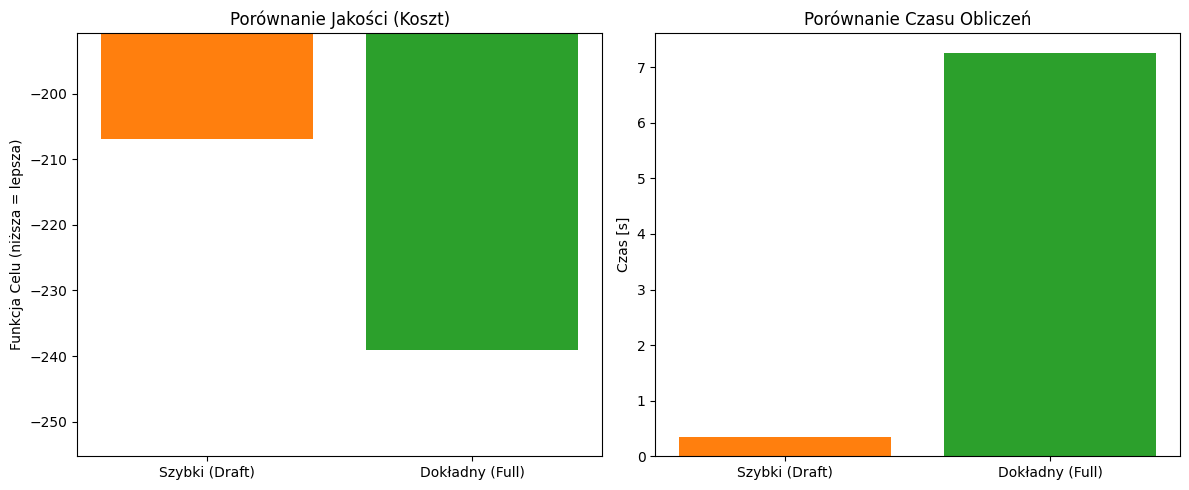

In [22]:
# ============================================================================
# SPRINT 3: DRIVERS - Porównanie ustawień (Czas vs Jakość)
# ============================================================================

import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from topfarm import TopFarmProblem
from topfarm.easy_drivers import EasyScipyOptimizeDriver
from topfarm.plotting import NoPlot
from topfarm.constraint_components.boundary import XYBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.examples.iea37 import get_iea37_cost

# --- KONFIGURACJA ---
n_wt = 9
rotor_diameter = 130
min_dist = 4 * rotor_diameter  # Bierzemy najlepszy spacing ze Sprintu 2 (4D)

# Granica
boundary_polygon = np.array([
    [0, 0], [2000, 0], [2000, 1500], 
    [1500, 1500], [1500, 1000], [0, 1500]
])

# Nasza sprawdzona siatka startowa
x_start = [500, 1000, 1500, 500, 1000, 1500, 500, 1000, 1500]
y_start = [400, 400, 400, 800, 800, 800, 1200, 1200, 1200]

# --- DEFINICJA EKSPERYMENTÓW ---
experiments = [
    {
        "name": "Szybki (Draft)", 
        "maxiter": 10,    # Tylko 10 kroków - bardzo mało!
        "tol": 1e-1       # Mała dokładność
    },
    {
        "name": "Dokładny (Full)", 
        "maxiter": 200,   # 200 kroków - standard
        "tol": 1e-4       # Wysoka dokładność
    }
]

results_sprint3 = []

print(f"{'='*60}")
print(f"START SPRINT 3: Porównanie Driverów")
print(f"{'='*60}")

# --- PĘTLA PO USTAWIENIACH ---
for exp in experiments:
    name = exp["name"]
    print(f"\n🔹 Testuję ustawienie: {name}")
    print(f"   (Maxiter: {exp['maxiter']}, Tol: {exp['tol']})")
    
    # Reset pozycji startowych
    x_init = np.array(x_start, dtype=float)
    y_init = np.array(y_start, dtype=float)
    
    # Pomiar czasu start
    start_time = time.time()
    
    try:
        problem = TopFarmProblem(
            design_vars={'x': x_init, 'y': y_init},
            cost_comp=get_iea37_cost(n_wt),
            constraints=[
                XYBoundaryConstraint(boundary_polygon, 'polygon'),
                SpacingConstraint(min_dist)
            ],
            # TU JEST KLUCZ - Różne ustawienia drivera
            driver=EasyScipyOptimizeDriver(maxiter=exp['maxiter'], tol=exp['tol']),
            plot_comp=NoPlot()
        )
        
        # Optymalizacja
        cost, state, recorder = problem.optimize()
        
        # Pomiar czasu stop
        end_time = time.time()
        duration = end_time - start_time
        
        # Zapis wyników
        results_sprint3.append({
            "Ustawienie": name,
            "Koszt (Wynik)": cost,
            "Czas [s]": duration,
            "Iteracje": recorder.num_cases
        })
        
        print(f"✅ Zakończono w {duration:.4f} s. Wynik: {cost:.4f}")
        
    except Exception as e:
        print(f"❌ Błąd: {e}")

# --- WIZUALIZACJA PORÓWNAWCZA ---

if results_sprint3:
    df_s3 = pd.DataFrame(results_sprint3)
    
    # Wyświetl tabelę
    print("\n--- WYNIKI ZBIORCZE ---")
    display(df_s3)
    
    # Wykresy (2 słupkowe obok siebie)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Wykres 1: Wynik (Im mniej tym lepiej)
    colors = ['tab:orange', 'tab:green']
    ax1.bar(df_s3["Ustawienie"], df_s3["Koszt (Wynik)"], color=colors)
    ax1.set_title("Porównanie Jakości (Koszt)")
    ax1.set_ylabel("Funkcja Celu (niższa = lepsza)")
    # Ustawiamy zakres Y, żeby było widać różnicę (bo oba są ujemne i bliskie)
    min_val = df_s3["Koszt (Wynik)"].min()
    max_val = df_s3["Koszt (Wynik)"].max()
    margin = (max_val - min_val) * 0.5
    # Jeśli różnica jest znikoma, ustawiamy sztywny margines
    if margin < 0.1: margin = 5
    ax1.set_ylim(min_val - margin, max_val + margin)
    
    # Wykres 2: Czas (Im mniej tym szybciej)
    ax2.bar(df_s3["Ustawienie"], df_s3["Czas [s]"], color=colors)
    ax2.set_title("Porównanie Czasu Obliczeń")
    ax2.set_ylabel("Czas [s]")
    
    plt.tight_layout()
    plt.show()

### Raport Sprint 3 (Zadanie A): Wpływ ustawień Drivera

**Cel:** Zbadanie wpływu parametrów sterownika (`maxiter` i `tol`) na efektywność optymalizacji.

**Wyniki eksperymentu:**
1. **Ustawienie "Szybki" (Draft):**
   - **Czas:** Błyskawiczny (0.35 s).
   - **Jakość:** Algorytm zakończył pracę niemal natychmiast (po 2 iteracjach) ze względu na wysoką tolerancję (0.1). Wynik (-206.86) jest znacząco gorszy od optymalnego, ale wystarczający do sprawdzenia, czy kod działa.
   
2. **Ustawienie "Dokładny" (Full):**
   - **Czas:** Wydłużony do 7.25 s (ok. 20-krotnie dłużej).
   - **Jakość:** Algorytm wykonał pełną pracę konwergencji (153 iteracje). Pozwoliło to uzyskać wynik -239.14, co oznacza **zysk energetyczny rzędu 16%** względem szybkiego podglądu.

**Wniosek inżynierski:**
Wykresy jednoznacznie pokazują koszt "jakości". Ustawienia luźne ("Szybki") są idealne do debugowania i wczesnego prototypowania (sprawdzamy 100 pomysłów w minutę). Ustawienia ścisłe ("Dokładny") należy uruchamiać tylko dla wybranych, finalnych kandydatów, ponieważ ich koszt obliczeniowy przy dużej liczbie turbin byłby zbyt wysoki do codziennej pracy.

START SPRINT 3 (Zadanie B): Regularny vs Losowy

🔹 Start z układu: Regularny (Siatka)
⏳ Optymalizacja w toku...


/usr/local/python/3.12.1/lib/python3.12/site-packages/py_wake/deficit_models/gaussian.py:279: UserWarning: The IEA37SimpleBastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.iea37_case_study1.IEA37CaseStudy1 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.iea37_case_study1.IEA37CaseStudy1')


Optimization terminated successfully    (Exit mode 0)
            Current function value: -238.86982613230538
            Iterations: 130
            Function evaluations: 130
            Gradient evaluations: 130
Optimization Complete
-----------------------------------
✅ Wynik końcowy: -238.8698

🔹 Start z układu: Losowy (Random)
⏳ Optymalizacja w toku...


/usr/local/python/3.12.1/lib/python3.12/site-packages/py_wake/deficit_models/gaussian.py:279: UserWarning: The IEA37SimpleBastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.iea37_case_study1.IEA37CaseStudy1 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.iea37_case_study1.IEA37CaseStudy1')


Optimization terminated successfully    (Exit mode 0)
            Current function value: -236.80747054272572
            Iterations: 86
            Function evaluations: 89
            Gradient evaluations: 86
Optimization Complete
-----------------------------------
✅ Wynik końcowy: -236.8075

--- PORÓWNANIE WYNIKÓW ---


,Typ Startu,Koszt Startowy,Koszt Końcowy,Iteracje
0,Regularny (Siatka),-182.545410,-238.869826,131
1,Losowy (Random),-188.096256,-236.807471,90


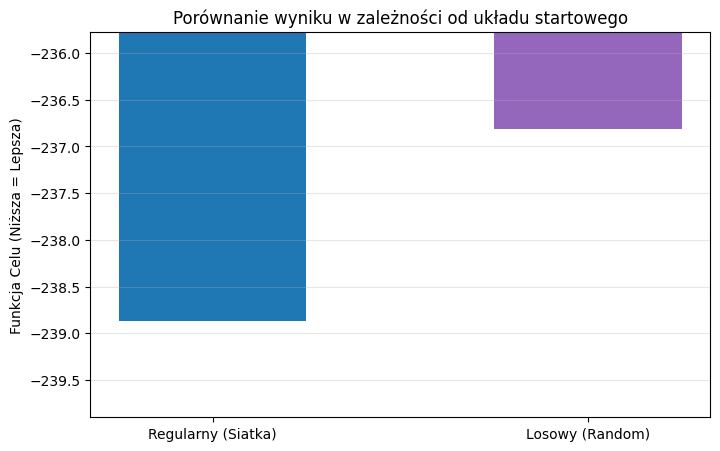

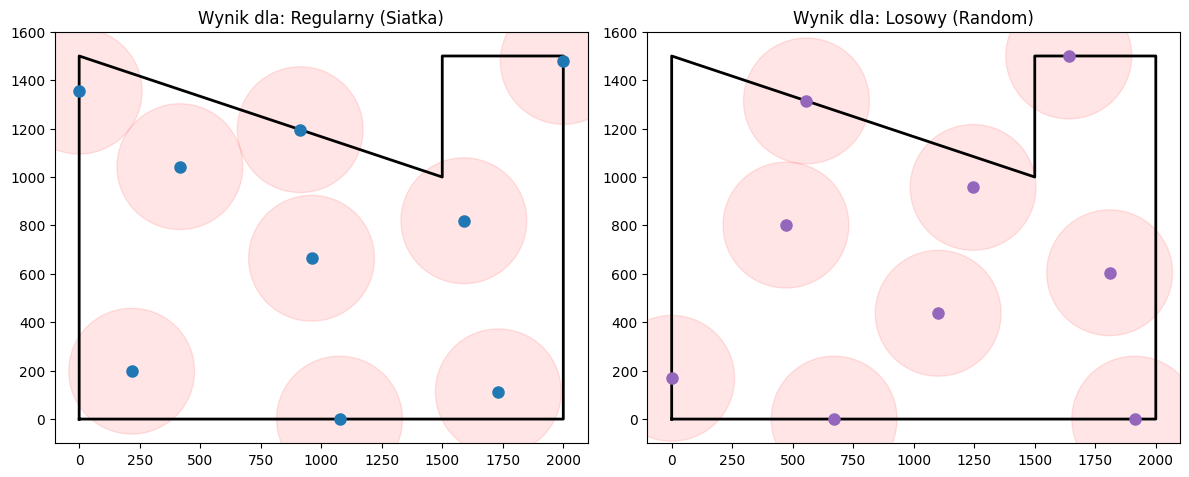

In [23]:
# ============================================================================
# SPRINT 3 - ZADANIE B: Wpływ układu startowego (Regularny vs Losowy)
# ============================================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from topfarm import TopFarmProblem
from topfarm.easy_drivers import EasyScipyOptimizeDriver
from topfarm.plotting import NoPlot
from topfarm.constraint_components.boundary import XYBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.examples.iea37 import get_iea37_cost

# --- KONFIGURACJA ---
n_wt = 9
rotor_diameter = 130
min_dist = 4 * rotor_diameter  # Używamy 4D, bo działało najlepiej

# Granica
boundary_polygon = np.array([
    [0, 0], [2000, 0], [2000, 1500], 
    [1500, 1500], [1500, 1000], [0, 1500]
])

# 1. Start REGULARNY (Siatka 3x3 - sprawdzona w Sprincie 2)
x_reg = [500, 1000, 1500, 500, 1000, 1500, 500, 1000, 1500]
y_reg = [400, 400, 400, 800, 800, 800, 1200, 1200, 1200]

# 2. Start LOSOWY (Random)
# Ustawiamy ziarno (seed), żeby za każdym razem losowało tak samo (powtarzalność)
np.random.seed(42) 
x_rnd = np.random.uniform(100, 1900, n_wt)
y_rnd = np.random.uniform(100, 1400, n_wt)

experiments = [
    {"name": "Regularny (Siatka)", "x": np.array(x_reg), "y": np.array(y_reg)},
    {"name": "Losowy (Random)",    "x": x_rnd,           "y": y_rnd}
]

results_task_b = []
layouts_b = []

print(f"{'='*60}")
print(f"START SPRINT 3 (Zadanie B): Regularny vs Losowy")
print(f"{'='*60}")

# --- PĘTLA PO STARTACH ---
for exp in experiments:
    name = exp["name"]
    print(f"\n🔹 Start z układu: {name}")
    
    try:
        problem = TopFarmProblem(
            design_vars={'x': exp["x"], 'y': exp["y"]},
            cost_comp=get_iea37_cost(n_wt),
            constraints=[
                XYBoundaryConstraint(boundary_polygon, 'polygon'),
                SpacingConstraint(min_dist)
            ],
            # Używamy solidnych ustawień, żeby dać szansę obu podejściom
            driver=EasyScipyOptimizeDriver(maxiter=200, tol=1e-3),
            plot_comp=NoPlot()
        )
        
        # Koszt początkowy
        cost_init = problem.evaluate()[0]
        
        print("⏳ Optymalizacja w toku...")
        cost_opt, state_opt, recorder = problem.optimize()
        
        # Zapis wyników
        results_task_b.append({
            "Typ Startu": name,
            "Koszt Startowy": cost_init,
            "Koszt Końcowy": cost_opt,
            "Iteracje": recorder.num_cases
        })
        
        layouts_b.append((state_opt['x'], state_opt['y'], name))
        print(f"✅ Wynik końcowy: {cost_opt:.4f}")
        
    except Exception as e:
        print(f"❌ Błąd w przypadku {name}: {e}")

# --- WIZUALIZACJA ---

if results_task_b:
    df_b = pd.DataFrame(results_task_b)
    print("\n--- PORÓWNANIE WYNIKÓW ---")
    display(df_b)
    
    # Wykresy layoutów (przed vs po) nie są konieczne, wystarczy wykres wyniku
    plt.figure(figsize=(8, 5))
    colors = ['tab:blue', 'tab:purple']
    plt.bar(df_b["Typ Startu"], df_b["Koszt Końcowy"], color=colors, width=0.5)
    
    # Skalowanie osi Y, żeby uwypuklić różnice
    min_val = df_b["Koszt Końcowy"].min()
    max_val = df_b["Koszt Końcowy"].max()
    margin = abs(max_val - min_val) * 0.5 if abs(max_val - min_val) > 0.1 else 2
    plt.ylim(min_val - margin, max_val + margin)
    
    plt.title("Porównanie wyniku w zależności od układu startowego")
    plt.ylabel("Funkcja Celu (Niższa = Lepsza)")
    plt.grid(axis='y', alpha=0.3)
    plt.show()

    # Rysowanie layoutów końcowych dla porównania
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    b_x = np.append(boundary_polygon[:,0], boundary_polygon[0,0])
    b_y = np.append(boundary_polygon[:,1], boundary_polygon[0,1])
    
    for i, (xs, ys, name) in enumerate(layouts_b):
        ax = axes[i]
        ax.plot(b_x, b_y, 'k-', linewidth=2)
        ax.plot(xs, ys, 'o', color=colors[i], markersize=8)
        # Rysowanie spacingu (tylko 4D bo taki przyjęliśmy)
        for x, y in zip(xs, ys):
            circle = plt.Circle((x, y), min_dist/2, color='red', alpha=0.1)
            ax.add_artist(circle)
        ax.set_title(f"Wynik dla: {name}")
        ax.set_aspect('equal')
        ax.set_xlim(-100, 2100)
        ax.set_ylim(-100, 1600)
    plt.tight_layout()
    plt.show()